#### In this notebook, I will classify real/fake review with labeled data using baseline model, logistic regression.


In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import train/test splited data
X_train = joblib.load('X_train_transformed.py') 
X_test = joblib.load('X_test_transformed.py')
y_train = joblib.load('y_train.py')
y_test = joblib.load('y_test.py')

In [3]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

#### Hyperparameter tuning

In [4]:
# run logistic regression with 50 C parameters to find out the hyperparameter value that yield highest test accuracy
validation_scores = []
train_scores = []

C_range = np.logspace(-5, 5, 50)

for c in C_range:
    my_logreg = LogisticRegression(C = c,random_state=1)
    my_logreg.fit(X_train,y_train)
    
    # train on traning set
    train_scores.append(my_logreg.score(X_train,y_train))
    # score on validation set
    validation_scores.append(my_logreg.score(X_test,y_test))

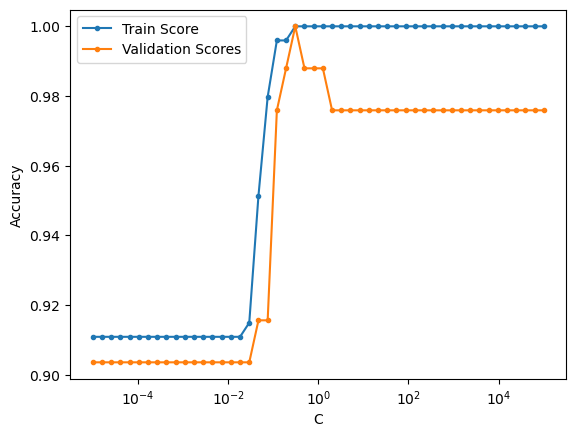

In [5]:
# Plot train & test accuracy of differnt C values 
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [6]:
# check max test score
max(validation_scores)

1.0